# Twitch Codecademy Project

This quick project uses sample data that the Twitch data science team provided to Codecademy for designing practice content.  The data has been scrubbed of any identifiable information and is for practice purposes only.  The original project was had two separate parts: one in SQL and one using Python for visualization.  In this notebook I've combined the two, using Python to run the SQL queries through SQLite, and using the full data sets with 600,000+ rows.  Note that this data is from January 1, 2015 and does not represent the current most popular games.

## Part 1: Exploring our data

We will begin by importing the packages we need and enabling our Jupyter notebook to display Matplotlib graphs.

In [1]:
from matplotlib import pyplot as plt
import sqlite3
import pandas as pd
import numpy as np

%matplotlib inline

Next, we need to connect to our database and see what tables it contains.  As we are using Python rather than running SQLite in the terminal, we cannot use the normal `.tables` command to view our database's tables.  Instead, we select the `name` of each table from `sqlite_master` and print it out:

In [2]:
conn = sqlite3.connect('twitch.db')

c = conn.cursor()

c.execute('SELECT name FROM sqlite_master WHERE type= "table"')

print(c.fetchall())

[('chat',), ('stream',)]


Now that we know our table names, we can write a function executes SQL queries and returns the output as a Pandas DataFrame.

In [3]:
def run_query(query):
    try:
        df = pd.read_sql(query, conn)
    except Exception as e:
        print(e.message)
    return df

Let's take a look at the first 20 rows of our two tables: `chat` and `stream`.

In [4]:
run_query('SELECT * FROM stream LIMIT 20;')

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,,
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,false
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,false
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,false
5,2015-01-01 23:27:36,343fe2bfd58595d5c18602d420ecf6f9d694d5a8,7814f661a54349ff5eee84f9d6f476918c9b7270,george,US,iphone_t,DayZ,,
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,true
7,2015-01-01 19:14:27,1e342e5e4e228f617449029054b3bb19c5224528,2aaf6a414bc3dc923b04f986de7ba1b8101c6698,frank,CA,site,League of Legends,high,false
8,2015-01-01 13:51:04,272cffbb1a9a33ad3bb48a2ee9ae5cbcac5ca22e,401716920e3435b5e3eec9fc4ccd6a44c7af38f5,kramer,TR,site,Counter-Strike: Global Offensive,chunked,false
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,false


In [5]:
run_query('SELECT * FROM chat LIMIT 20;')

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,,Dota 2
5,2015-01-01 17:59:51,6fcc75522de37833a0fb21fba4965aad3b63ea57,f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0,jerry,RU,,Dota 2
6,2015-01-01 02:24:33,dea94b3030025d837dd841fbfd479e775987f65d,9dbbcf6c7792074771c4c7284807041eac467ad5,elaine,TW,,Gaming Talk Shows
7,2015-01-01 18:26:34,671bee0f3d66077876d9bc231990597292392cc2,51c286a41daa8e060275f622f2b8436bee9fab91,jerry,UA,,Dota 2
8,2015-01-01 13:13:18,8b31d5ebd1f4f41d4365ae4a471c1686dd256745,06decad1d9565150791e183da017f47123433a4c,estelle,GB,ipad_t,Dota 2
9,2015-01-01 20:20:55,f2ebb129e6930e608f2ed3f5fb52bc4d533c4891,4679f8113aa157ba76fc6db5878d7ee625e88d55,frank,CA,,League of Legends


Let's say we want to see all of the unique games and channels from our `stream` table:

In [6]:
run_query('SELECT DISTINCT game FROM stream;')

,game
0,League of Legends
1,DayZ
2,Dota 2
3,Heroes of the Storm
4,Counter-Strike: Global Offensive
5,Hearthstone: Heroes of Warcraft
6,The Binding of Isaac: Rebirth
7,Agar.io
8,Gaming Talk Shows
9,


In [7]:
run_query('SELECT DISTINCT channel FROM stream;')

,channel
0,frank
1,george
2,estelle
3,morty
4,kramer
5,jerry
6,helen
7,newman
8,elaine
9,susan


Now let's check out the most popular games that were streamed.

In [8]:
popular_games = '''SELECT game, COUNT(*) AS 'count'
                   FROM stream
                   GROUP BY game
                   ORDER BY count DESC;'''

run_query(popular_games)

,game,count
0,League of Legends,193533
1,Dota 2,85608
2,Counter-Strike: Global Offensive,54438
3,DayZ,38004
4,Heroes of the Storm,35310
5,The Binding of Isaac: Rebirth,29467
6,Gaming Talk Shows,28115
7,World of Tanks,15932
8,Hearthstone: Heroes of Warcraft,14399
9,Agar.io,11480


League of Legends had by far the most streams.  If we want to see the top 10 countries where they streamed LoL games, we can run the following query:

In [9]:
lol_countries = '''SELECT country, COUNT(*) AS 'count'
                   FROM stream
                   WHERE game LIKE 'League of Legends'
                   GROUP BY 1
                   ORDER BY 2 DESC
                   LIMIT 10;'''

run_query(lol_countries)

,country,count
0,US,85606
1,CA,13034
2,DE,10835
3,,7641
4,GB,6964
5,TR,4412
6,AU,3911
7,SE,3533
8,NL,3213
9,DK,2909


What if we want to know the type of device/media player people are watching these streams on?  To find out, we can check out the `player` column.

In [10]:
top_stream_devices = '''SELECT player, COUNT(*) AS 'count'
                        FROM stream
                        GROUP BY 1
                        ORDER BY 2 DESC;'''

run_query(top_stream_devices)

,player,count
0,site,246115
1,iphone_t,100689
2,android,93508
3,ipad_t,53646
4,embed,19819
5,xbox_one,4863
6,home,3479
7,frontpage,1567
8,amazon,1155
9,xbox360,985


If we want to classify the games by genre we can query using a CASE WHEN statement to mark the genre of each game:

In [11]:
genres = '''SELECT game, 
              CASE
                WHEN game = 'League of Legends' THEN 'MOBA'
                WHEN game = 'Dota 2' THEN 'MOBA'
                WHEN game = 'Heroes of the Storm' THEN 'MOBA'
                WHEN game = 'Counter-Strike: Global Offensive' THEN 'FPS'
                WHEN game = 'DayZ' THEN 'Survival'
                WHEN game = 'ARK: Survival Evolved' THEN 'Survival'
                ELSE 'Other'
              END AS 'genre',
              COUNT(*) AS 'count'
            FROM stream
            GROUP BY 1
            ORDER BY 3 DESC;'''

run_query(genres)

,game,genre,count
0,League of Legends,MOBA,193533
1,Dota 2,MOBA,85608
2,Counter-Strike: Global Offensive,FPS,54438
3,DayZ,Survival,38004
4,Heroes of the Storm,MOBA,35310
5,The Binding of Isaac: Rebirth,Other,29467
6,Gaming Talk Shows,Other,28115
7,World of Tanks,Other,15932
8,Hearthstone: Heroes of Warcraft,Other,14399
9,Agar.io,Other,11480


Since we have a `time` column, we can also explore how streaming numbers change depending on the hour of the day.  To do this best, we will use SQLite's `strftime()` function.

In [12]:
us_by_hr = '''SELECT strftime('%H', time) AS 'hour', COUNT(*) AS 'count' 
              FROM stream
              WHERE country = 'US'
              GROUP BY 1;'''

run_query(us_by_hr)

,hour,count
0,00,7025
1,01,4693
2,02,5961
3,03,4236
4,04,3567
5,05,1597
6,06,236
7,07,338
8,08,935
9,09,1214


Since the two tables share a common `device_id` column, we can combine join them using that column.

In [13]:
join = '''SELECT * FROM stream
          JOIN chat
          ON stream.device_id = chat.device_id;'''

run_query(join)

,time,device_id,login,channel,country,player,game,stream_format,subscriber,time,device_id,login,channel,country,player,game
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,,,2015-01-01 22:43:57,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 20:41:09,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
2,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 20:41:16,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
3,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 20:46:02,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
4,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 21:19:08,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
5,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 21:23:49,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
6,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 22:00:41,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
7,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 22:02:43,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
8,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 22:09:32,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ
9,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false,2015-01-01 22:09:49,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,,DayZ


## Part 2: Visualizing our data

Earlier, we created a list of the most popular games by stream-count.  Let's check out the top 10 games and make some visualizations.  

In [14]:
top_ten = '''SELECT game, COUNT(*) AS 'viewers'
             FROM stream
             GROUP BY game
             ORDER BY viewers DESC
             LIMIT 10;'''

top_10 = run_query(top_ten)
top_10

,game,viewers
0,League of Legends,193533
1,Dota 2,85608
2,Counter-Strike: Global Offensive,54438
3,DayZ,38004
4,Heroes of the Storm,35310
5,The Binding of Isaac: Rebirth,29467
6,Gaming Talk Shows,28115
7,World of Tanks,15932
8,Hearthstone: Heroes of Warcraft,14399
9,Agar.io,11480


From here, we will shorten the names and plot a bar graph.

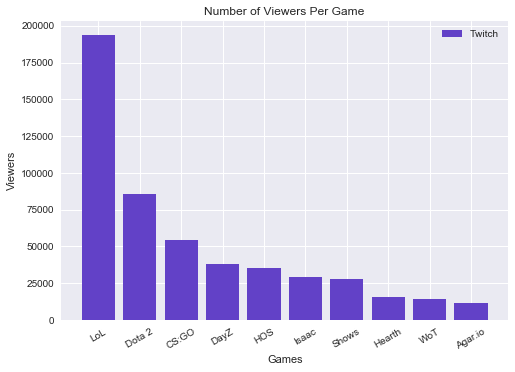

<Figure size 576x396 with 0 Axes>

In [15]:
plt.style.use('seaborn')

games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]

f, ax = plt.subplots()
plt.bar(range(len(games)), top_10['viewers'], color='xkcd:bluey purple')
plt.title('Number of Viewers Per Game')
plt.legend(['Twitch'])
plt.xlabel('Games')
plt.ylabel('Viewers')
ax.set_xticks(range(len(games)))
ax.set_xticklabels(games, rotation=30)
plt.show()
plt.clf()

Earlier, we took a look at where the 193,000+ LoL viewers were located:

In [16]:
lol_country_df = run_query(lol_countries)
lol_country_df

,country,count
0,US,85606
1,CA,13034
2,DE,10835
3,,7641
4,GB,6964
5,TR,4412
6,AU,3911
7,SE,3533
8,NL,3213
9,DK,2909


A better way to view this would be through a pie chart.  To do so, we'll start by calculating the number of viewers from outside the top ten countries.

In [17]:
others = top_10['viewers'][0] - sum(lol_country_df['count'])
others

51475

Next, we'll add that into our `lol_country_df` DataFrame and also rename the blank country as `N/A`.

In [18]:
lol_country_df = lol_country_df.append([{'country': 'Others', 'count': others}], ignore_index=True)

In [19]:
lol_country_df.loc[3, 'country'] = 'N/A'
lol_country_df

,country,count
0,US,85606
1,CA,13034
2,DE,10835
3,N/A,7641
4,GB,6964
5,TR,4412
6,AU,3911
7,SE,3533
8,NL,3213
9,DK,2909


Now, we can easily plot out our pie chart using the following code.

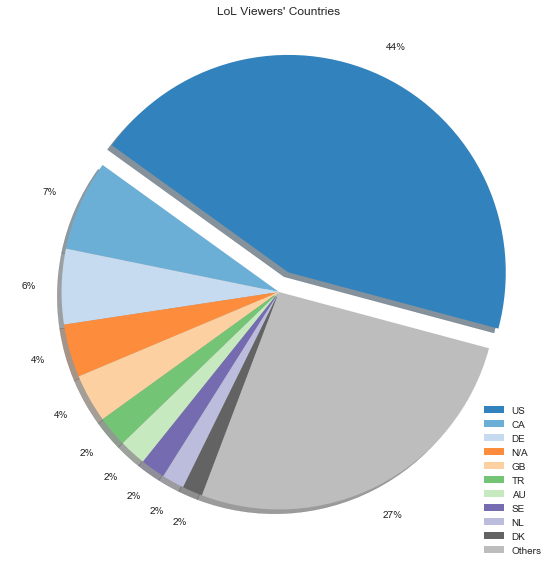

<Figure size 576x396 with 0 Axes>

In [20]:
my_cmap = plt.cm.get_cmap('tab20c')
colors = my_cmap([0 + (x * 0.0918) for x in range(11)])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

f, ax2 = plt.subplots(figsize=(12, 10))
plt.pie(x='count', data=lol_country_df, explode=explode, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)
plt.title("LoL Viewers' Countries")
plt.legend(lol_country_df['country'], loc='lower right')
plt.show()
plt.clf()

Finally, let's use our temporal data to graph the fluctuation in viewers over the course of the day.  

In [21]:
us_hr_df = run_query(us_by_hr)
us_hr_df

,hour,count
0,00,7025
1,01,4693
2,02,5961
3,03,4236
4,04,3567
5,05,1597
6,06,236
7,07,338
8,08,935
9,09,1214


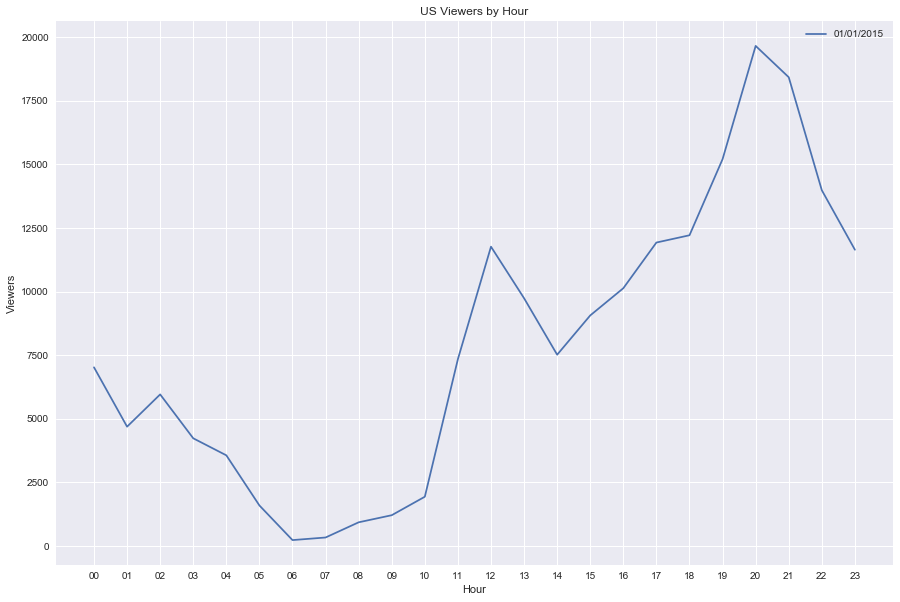

<Figure size 576x396 with 0 Axes>

In [22]:
f, ax3 = plt.subplots(figsize=(15, 10))
plt.plot('hour', 'count', data=us_hr_df)
plt.title('US Viewers by Hour')
plt.xlabel('Hour')
plt.ylabel('Viewers')
plt.legend(['01/01/2015'])
plt.show()
plt.clf()

It looks like the number of U.S. viewers peaked at around 8 p.m. on January 1, 2015.  Of course, there could be some error in these numbers, as people sometimes leave their browsers open.  Assuming a 15 percent error in our data, we can re-plot the line graph to show the potential range of actual viewers during this time.

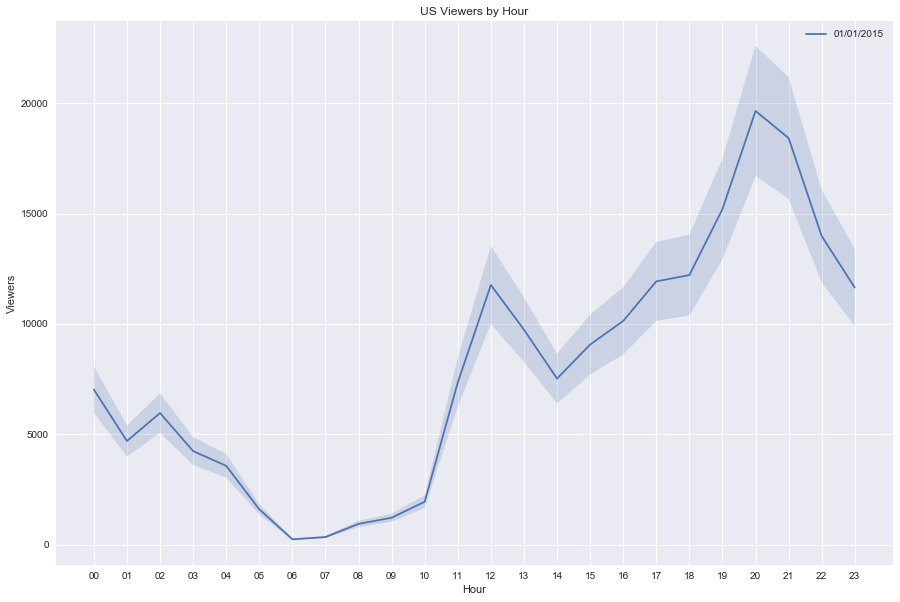

<Figure size 576x396 with 0 Axes>

In [23]:
f, ax3 = plt.subplots(figsize=(15, 10))

y_upper = [x + x * 0.15 for x in us_hr_df['count']]
y_lower = [x - x * 0.15 for x in us_hr_df['count']]

plt.plot('hour', 'count', data=us_hr_df)
plt.title('US Viewers by Hour')
plt.xlabel('Hour')
plt.ylabel('Viewers')
plt.legend(['01/01/2015'])
plt.fill_between(us_hr_df['hour'], y_upper, y_lower, alpha=0.2) # displays margin of error
plt.show()
plt.clf()

In [24]:
conn.close()